# EDA 

In this notebook, we will perform an Exploratory Data Analysis (EDA). The goal is to uncover insights about customer spending, product performance, regional trends, and more.

---

### 1. Importing Necessary Libraries

We start by importing the required libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the Datasets

We load the customer, product, and transaction datasets into pandas DataFrames.

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


### 3. Merging the Datasets

We merge the datasets on their common keys (CustomerID and ProductID) to create a comprehensive dataset that combines customer, product, and transaction details.

In [3]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

### 4. Cleaning the Data

We clean the dataset by ensuring that column names don’t have extra whitespaces and by handling price columns that may have different names after merging.

In [4]:
# Strip any extra whitespace from column names
data.columns = data.columns.str.strip()

# Use the correct price column if there's ambiguity
if 'Price_y' in data.columns:
    data.rename(columns={'Price_y': 'Price'}, inplace=True)
elif 'Price_x' in data.columns:
    data.rename(columns={'Price_x': 'Price'}, inplace=True)

### 5. Basic Data Exploration

Before diving into the analysis, let’s take a quick look at the data’s structure, basic statistics, and missing values.

In [5]:
# Basic Exploration of the dataset
print("\nBasic Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price            1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None

Summary Statistics:
          Quantity   TotalValue     Price_x       Price
count  1000.000000  1000.000000  1000.00000  

### 6. Date Conversion

We convert the SignupDate and TransactionDate columns to datetime format. This is necessary for performing time-based analyses.

In [6]:
# Convert date columns to datetime format
data['SignupDate'] = pd.to_datetime(data['SignupDate'], errors='coerce')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Check for any conversion issues
print(f"{data['SignupDate'].isnull().sum()} dates could not be converted.")

0 dates could not be converted.


### 7. Customer Segmentation Analysis

We want to identify the highest spending customers. Let’s group the data by CustomerID and calculate the total spending for each customer.

In [7]:
# Customer Segmentation Analysis: Top High-Value Customers
customer_spending = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 High-Value Customers:")
print(customer_spending.head())


Top 5 High-Value Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


### 9. Analyzing Seasonal Trends

Next, we will examine the monthly sales trends to detect any seasonal patterns.

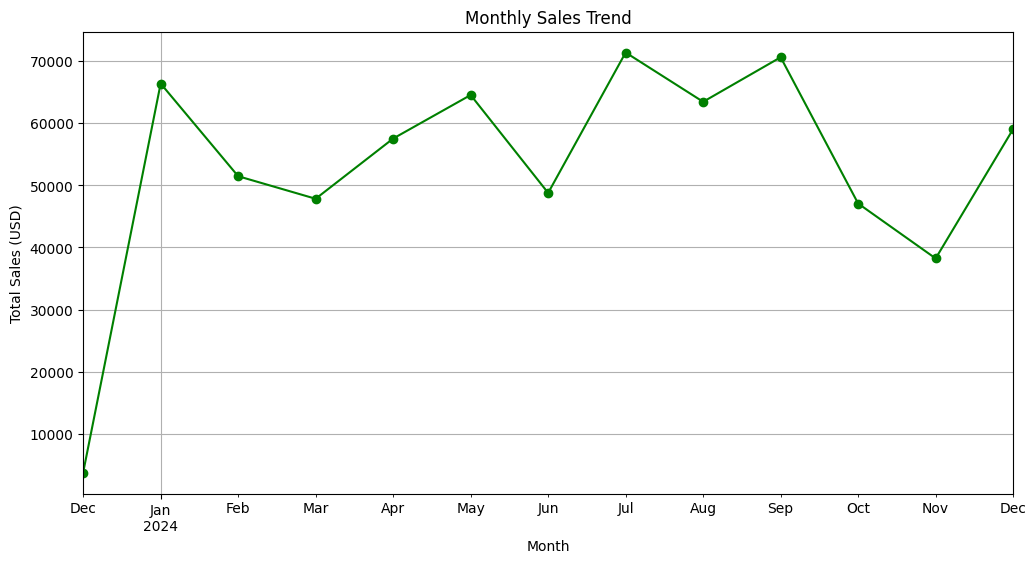

In [8]:
# Seasonal Trends and Sales Patterns
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

### 10. Product Performance Analysis

We’ll now analyze which products are performing the best in terms of total revenue.

In [9]:
# Product Performance Analysis: Best-Selling Products
product_sales = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 Best-Selling Products:")
print(product_sales.head())


Top 5 Best-Selling Products:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


### 11. Visualizing Best-Selling Products

We will now visualize the top 10 best-selling products to understand product performance better.

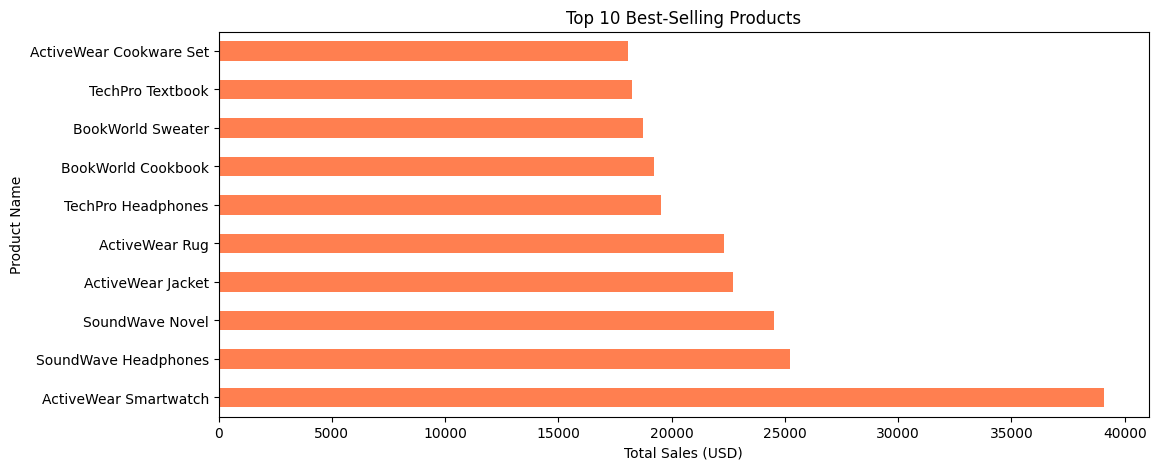

In [10]:
# Visualizing Top 10 Best-Selling Products
plt.figure(figsize=(12,5))
product_sales.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()

### 12. Customer Acquisition Analysis

We will analyze customer sign-up trends over time to see how the customer base is growing.

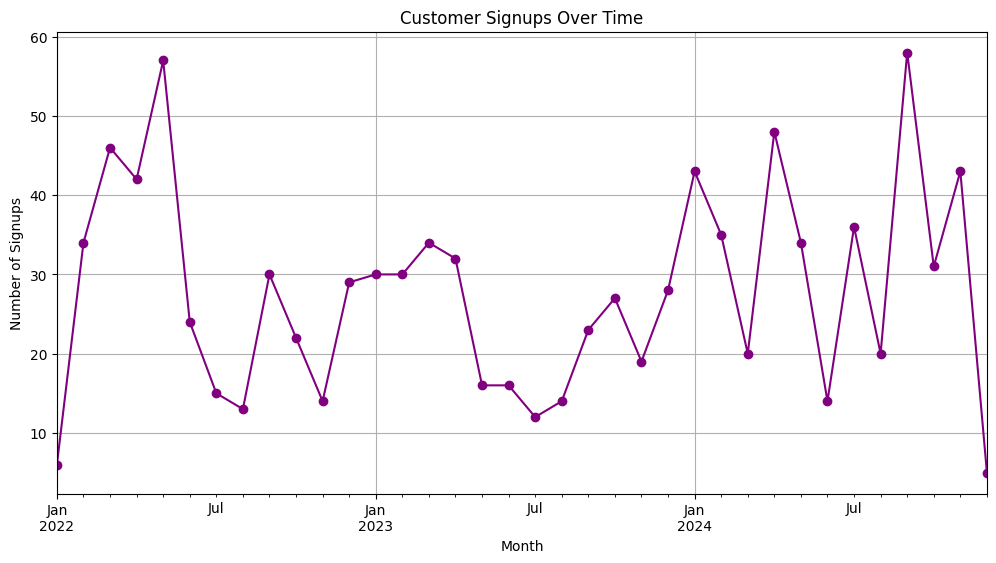

In [11]:
# Customer Acquisition Analysis: Signup Trend
signup_trend = data['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,6))
signup_trend.plot(kind='line', marker='o', color='purple')
plt.title('Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()

### 13. Pricing Strategy Analysis

Let’s analyze the relationship between price and total transaction value. We’ll plot a scatterplot to understand the impact of price on the total transaction value.

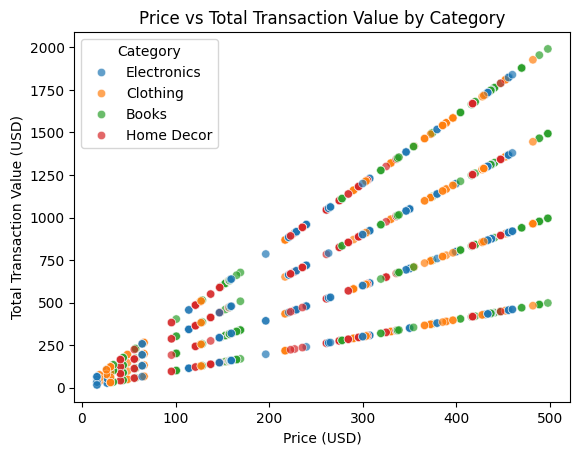

In [12]:
# Pricing Strategy Analysis: Price vs Transaction Value
sns.scatterplot(data=data, x='Price', y='TotalValue', hue='Category', alpha=0.7)
plt.title('Price vs Total Transaction Value by Category')
plt.xlabel('Price (USD)')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

### 14. Correlation Analysis

Next, we explore the correlation between price, quantity, and total transaction value to see how they are related.

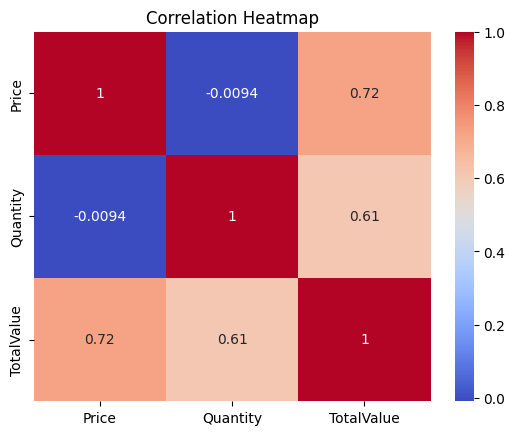

In [13]:
# Correlation Analysis: Price, Quantity, TotalValue
correlation_matrix = data[['Price', 'Quantity', 'TotalValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 15. Customer Distribution by Region

We now analyze the customer distribution by region to understand where most customers are located.

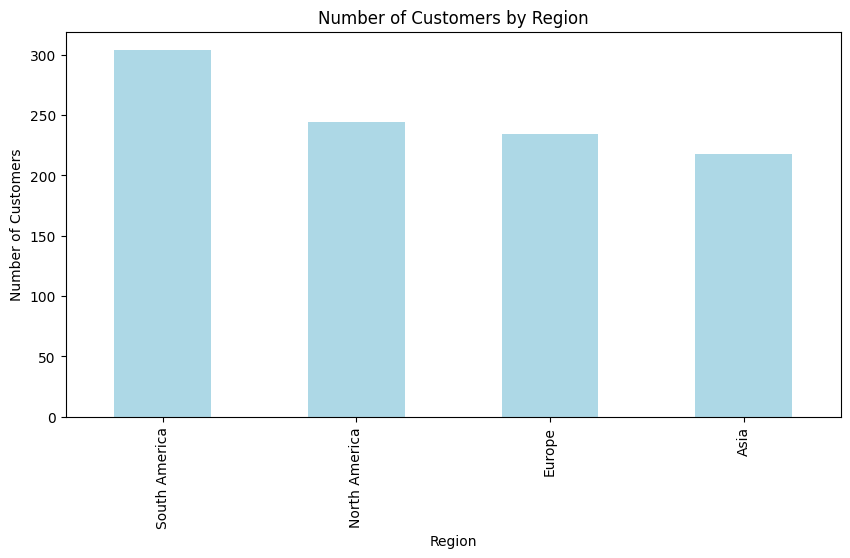

In [14]:
# Customer Distribution by Region
region_counts = data['Region'].value_counts()
plt.figure(figsize=(10,5))
region_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

### 16. Most Sold Product Category by Region

We’ll now find out which product category is the most sold in each region.

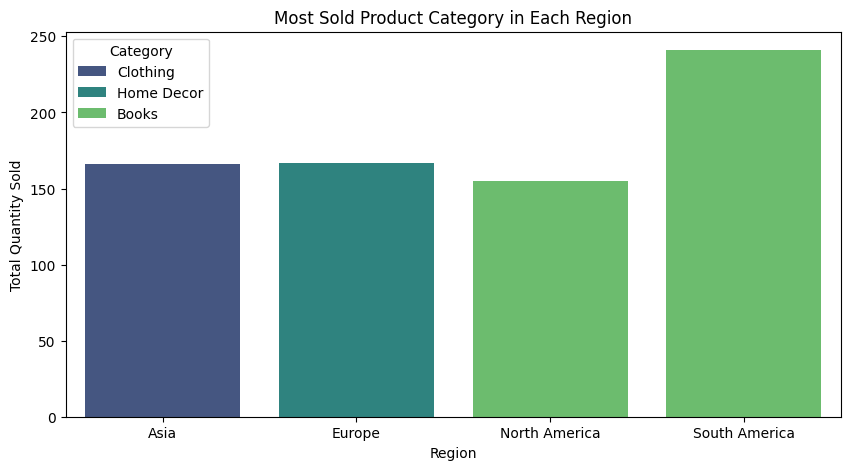

In [15]:
# Most Sold Product Category by Region
most_sold_category = data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
most_sold_category = most_sold_category.loc[most_sold_category.groupby('Region')['Quantity'].idxmax()]

plt.figure(figsize=(10, 5))
sns.barplot(data=most_sold_category, x='Region', y='Quantity', hue='Category', palette='viridis')
plt.title('Most Sold Product Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Category')
plt.show()

### 17. Top Spending Region Analysis

We now analyze which regions are spending the most in total.

In [16]:
# Top Spending Region Analysis
top_spending_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop Spending Regions:")
print(top_spending_region.head())


Top Spending Regions:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


### 18. Visualizing Top Spending Regions

Let’s visualize the top regions by total spending to understand regional patterns in spending.

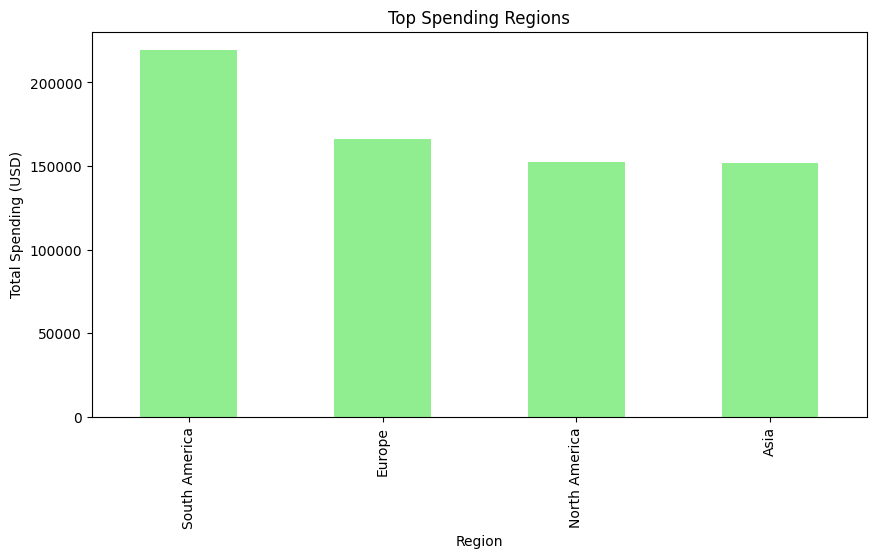

In [17]:
# Visualizing Top Spending Regions
plt.figure(figsize=(10,5))
top_spending_region.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Spending Regions')
plt.xlabel('Region')
plt.ylabel('Total Spending (USD)')
plt.show()

## 19. Identifying Top and Low-Selling Products

Finally, we identify the top 10 high-selling products and low-selling products, based on total revenue generated.

In [18]:
# Identifying Top 10 High-Selling Products
top_selling_products = data.groupby('ProductName').agg({'TotalValue': 'sum', 'Price': 'mean'}).sort_values(by='TotalValue', ascending=False)
print("\nTop 10 High-Selling Products:")
print(top_selling_products.head(10))

# Identifying Top 10 Low-Selling Products
low_selling_products = data.groupby('ProductName').agg({'TotalValue': 'sum', 'Price': 'mean'}).sort_values(by='TotalValue', ascending=True)
print("\nTop 10 Low-Selling Products:")
print(low_selling_products.head(10))


Top 10 High-Selling Products:
                         TotalValue       Price
ProductName                                    
ActiveWear Smartwatch      39096.97  399.431750
SoundWave Headphones       25211.64  263.834474
SoundWave Novel            24507.90  420.735000
ActiveWear Jacket          22712.56  303.696923
ActiveWear Rug             22314.43  284.657931
TechPro Headphones         19513.80  433.640000
BookWorld Cookbook         19221.99  412.449500
BookWorld Sweater          18743.79  401.698421
TechPro Textbook           18267.96  287.874000
ActiveWear Cookware Set    18083.73  357.438571

Top 10 Low-Selling Products:
                             TotalValue   Price
ProductName                                    
ComfortLiving Laptop             647.76   26.99
ActiveWear T-Shirt               795.34   30.59
ComfortLiving Rug               1063.81   55.99
SoundWave Bluetooth Speaker     1223.22   64.38
ComfortLiving Desk Lamp         1694.16   65.16
BookWorld Rug              

### 20. Visualizing Price Comparison: High-Selling vs Low-Selling Products

We will now compare the price distributions of high-selling and low-selling products.

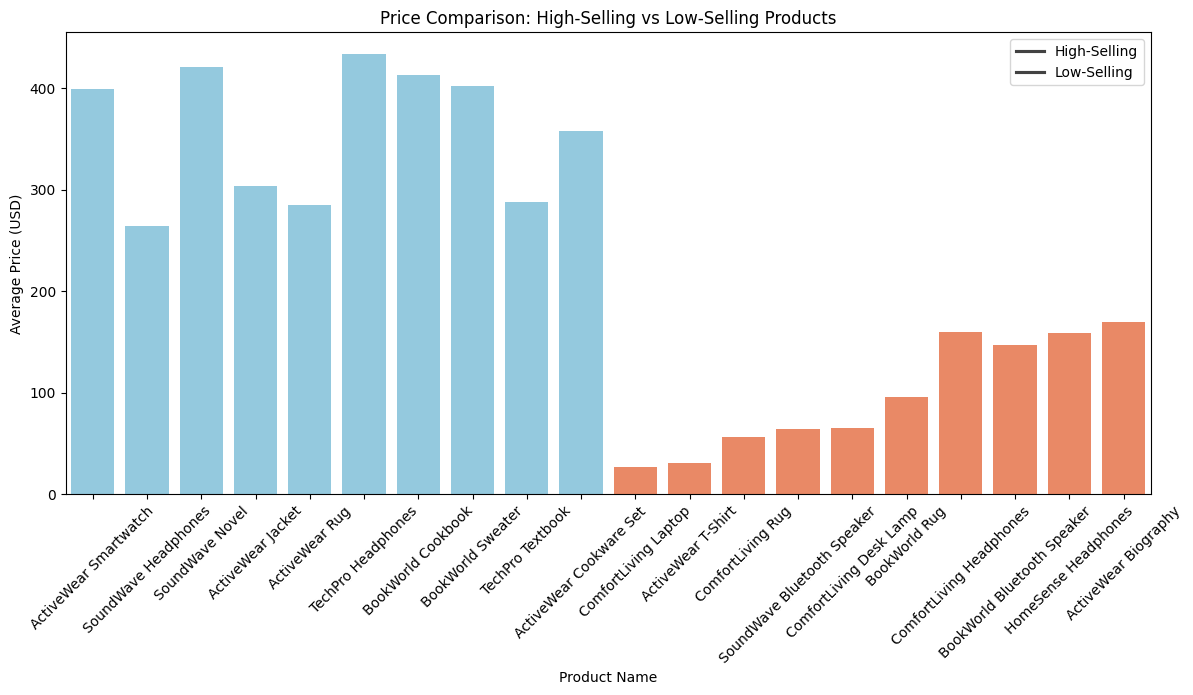

In [19]:
# Combine datasets for comparison of high vs low-selling products
comparison = pd.concat([top_selling_products.head(10), low_selling_products.head(10)], axis=0)
comparison.reset_index(inplace=True)

# Visualization: Compare Pricing of High-Selling vs Low-Selling Products
plt.figure(figsize=(14,6))
sns.barplot(data=comparison, x='ProductName', y='Price', hue=comparison.index < 10, palette=['coral', 'skyblue'])
plt.xticks(rotation=45)
plt.title('Price Comparison: High-Selling vs Low-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Average Price (USD)')
plt.legend(['High-Selling', 'Low-Selling'])
plt.show()

### 21. Boxplot for Price Distribution

Finally, we compare the price distributions of high-selling and low-selling products using a boxplot.

/var/folders/7v/r3rwsh5x27g24kz665l81xg80000gn/T/ipykernel_12202/3220853861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comparison, x=comparison.index < 10, y='Price', palette=['coral', 'skyblue'])


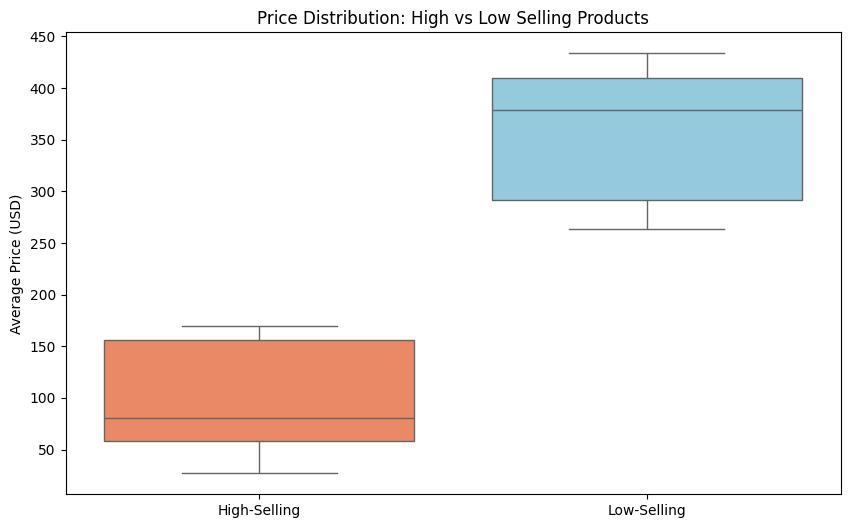

In [20]:
# Boxplot for Price Distribution: High vs Low-Selling Products
plt.figure(figsize=(10,6))
sns.boxplot(data=comparison, x=comparison.index < 10, y='Price', palette=['coral', 'skyblue'])
plt.xticks([0, 1], ['High-Selling', 'Low-Selling'])
plt.title('Price Distribution: High vs Low Selling Products')
plt.ylabel('Average Price (USD)')
plt.show()
